In [40]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_and_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [41]:
data

['t_n55          8.8673 ( 8.4894,  9.3299) ( 8.4577,  9.2884)  0.8306 (Jnode 106)\n',
 't_n56          8.7518 ( 8.4235,  9.1219) ( 8.4090,  9.0997)  0.6907 (Jnode 105)\n',
 't_n57          8.3157 ( 8.0377,  8.6298) ( 8.0270,  8.6115)  0.5845 (Jnode 104)\n',
 't_n58          7.2492 ( 7.0843,  7.4358) ( 7.0735,  7.4212)  0.3477 (Jnode 103)\n',
 't_n59          7.0527 ( 6.9030,  7.2228) ( 6.9010,  7.2190)  0.3180 (Jnode 102)\n',
 't_n60          6.8065 ( 6.6590,  6.9711) ( 6.6566,  6.9660)  0.3095 (Jnode 101)\n',
 't_n61          6.4421 ( 6.2899,  6.6031) ( 6.2892,  6.6018)  0.3127 (Jnode 100)\n',
 't_n62          3.1777 ( 2.7299,  3.5299) ( 2.7658,  3.5576)  0.7917 (Jnode 99)\n',
 't_n63          4.9617 ( 4.7856,  5.1720) ( 4.7804,  5.1646)  0.3842 (Jnode 98)\n',
 't_n64          3.9296 ( 3.7365,  4.1428) ( 3.7249,  4.1285)  0.4036 (Jnode 97)\n',
 't_n65          3.6054 ( 3.4194,  3.8016) ( 3.4168,  3.7978)  0.3809 (Jnode 96)\n',
 't_n66          3.0206 ( 2.8560,  3.1888) ( 2.8592,  3.19

In [42]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [43]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [44]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [45]:
posterior_mean_iqtree

[8.8673,
 8.7518,
 8.3157,
 7.2492,
 7.0527,
 6.8065,
 6.4421,
 3.1777,
 4.9617,
 3.9296,
 3.6054,
 3.0206,
 2.2788,
 1.6665,
 0.6954,
 3.8877,
 6.8804,
 6.675,
 6.434,
 4.922,
 4.4789,
 5.0602,
 6.8054,
 6.5613,
 6.3541,
 6.0519,
 5.6404,
 5.5049,
 4.9372,
 4.5746,
 4.2559,
 3.3309,
 3.1134,
 5.0179,
 4.2322,
 6.6941,
 1.6498,
 6.547,
 6.2243,
 5.7032,
 5.4026,
 4.1504,
 4.7437,
 5.4515,
 5.2544,
 4.9348,
 3.7653,
 4.8105,
 7.618,
 5.8082,
 3.7579,
 2.8906,
 6.0716]

In [46]:
lower_ci_iqtree

[0.4894,
 0.4235,
 0.0377,
 0.0843,
 0.903,
 0.659,
 0.2899,
 0.7299,
 0.7856,
 0.7365,
 0.4194,
 0.856,
 0.1741,
 0.6491,
 0.6236,
 0.6551,
 0.7406,
 0.4808,
 0.3248,
 0.6521,
 0.163,
 0.0432,
 0.6628,
 0.4203,
 0.2092,
 0.919,
 0.531,
 0.3806,
 0.7991,
 0.4393,
 0.1194,
 0.2364,
 0.0556,
 0.9761,
 0.1619,
 0.5528,
 0.2234,
 0.4119,
 0.1006,
 0.5956,
 0.3157,
 0.9158,
 0.7024,
 0.2695,
 0.0454,
 0.7044,
 0.441,
 0.458,
 0.3474,
 0.4041,
 0.2652,
 0.2549,
 0.3971]

In [47]:
upper_ci_iqtree

[9.3299,
 9.1219,
 8.6298,
 7.4358,
 7.2228,
 6.9711,
 6.6031,
 3.5299,
 5.172,
 4.1428,
 3.8016,
 3.1888,
 2.3947,
 1.7149,
 0.7828,
 4.1485,
 7.0491,
 6.8725,
 6.5746,
 5.1176,
 4.7444,
 5.1044,
 6.9605,
 6.7161,
 6.5098,
 6.1951,
 5.7582,
 5.6279,
 5.0633,
 4.7144,
 4.4017,
 3.4706,
 3.254,
 5.1182,
 4.359,
 6.8471,
 2.0086,
 6.694,
 6.3552,
 5.8129,
 5.485,
 4.3584,
 4.834,
 5.5991,
 5.4183,
 5.094,
 4.0628,
 5.0606,
 7.9145,
 6.1942,
 4.2414,
 3.4338,
 6.7821]

In [48]:
file_LG = open("LG_cherry_and_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

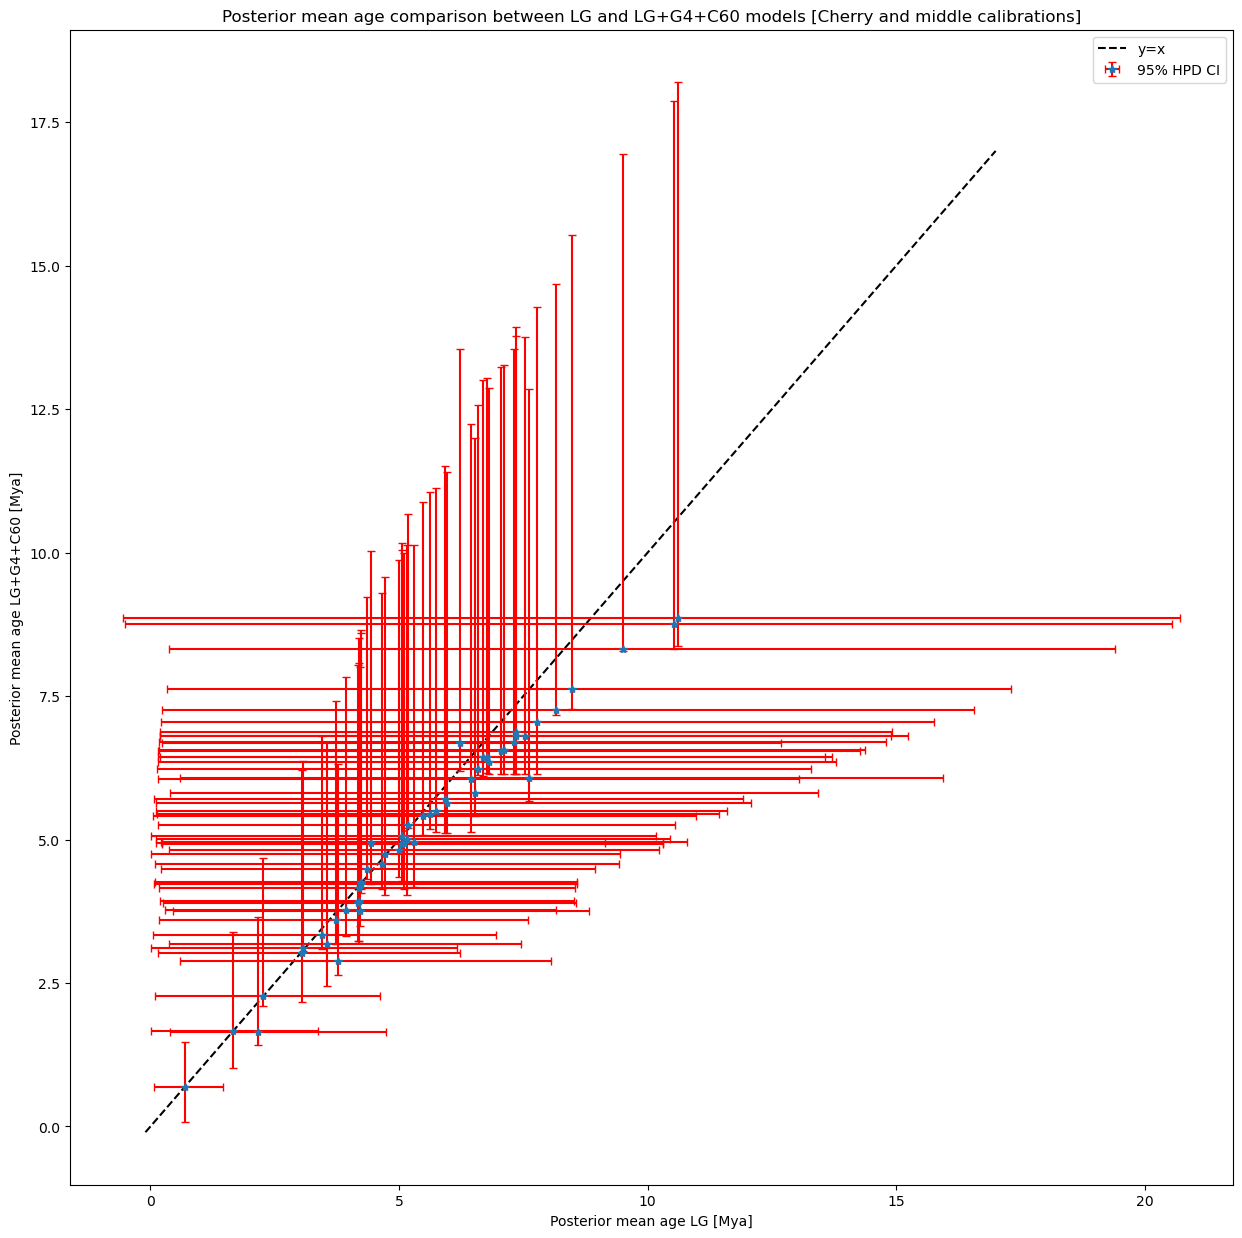

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Cherry and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cm.png')

In [50]:
posterior_mean_baseml

[10.6067,
 10.5272,
 9.5013,
 8.1666,
 7.7688,
 7.3481,
 6.7623,
 3.5443,
 5.3044,
 4.1926,
 3.7283,
 3.056,
 2.2692,
 1.6631,
 0.6911,
 4.1757,
 7.3558,
 6.2292,
 6.6961,
 5.0579,
 4.3521,
 5.0626,
 7.5286,
 7.1017,
 6.8146,
 6.4437,
 5.9749,
 5.737,
 5.1021,
 4.6573,
 4.2436,
 3.4462,
 3.0681,
 5.1674,
 4.2273,
 7.3118,
 2.1554,
 7.0599,
 6.5796,
 5.9188,
 5.4781,
 4.202,
 4.7124,
 5.6322,
 5.1711,
 4.4461,
 3.9268,
 4.9983,
 8.4819,
 6.5279,
 4.2099,
 3.7662,
 7.6112]

In [51]:
posterior_mean_iqtree

[8.8673,
 8.7518,
 8.3157,
 7.2492,
 7.0527,
 6.8065,
 6.4421,
 3.1777,
 4.9617,
 3.9296,
 3.6054,
 3.0206,
 2.2788,
 1.6665,
 0.6954,
 3.8877,
 6.8804,
 6.675,
 6.434,
 4.922,
 4.4789,
 5.0602,
 6.8054,
 6.5613,
 6.3541,
 6.0519,
 5.6404,
 5.5049,
 4.9372,
 4.5746,
 4.2559,
 3.3309,
 3.1134,
 5.0179,
 4.2322,
 6.6941,
 1.6498,
 6.547,
 6.2243,
 5.7032,
 5.4026,
 4.1504,
 4.7437,
 5.4515,
 5.2544,
 4.9348,
 3.7653,
 4.8105,
 7.618,
 5.8082,
 3.7579,
 2.8906,
 6.0716]

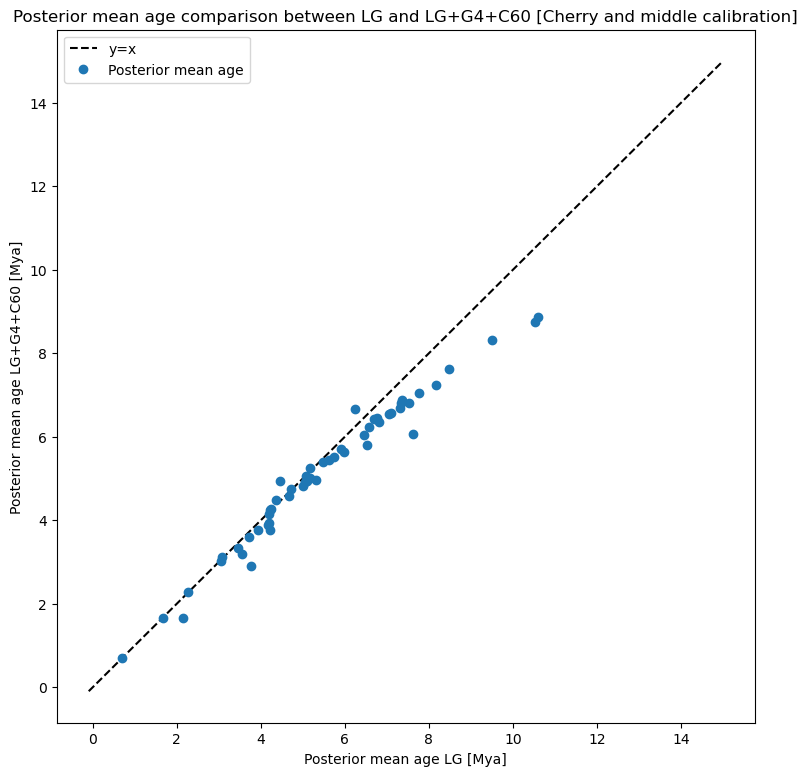

In [52]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry and middle calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cm_scatter.png')